In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_json(r'C:\Users\Sunny\Desktop\New folder\Hack\file.json',lines=True)

In [4]:
df.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


In [5]:
df.rename(columns={'bra size':'bra_size','cup size':'cup_size','shoe size':'shoe_size','shoe width':'shoe_width'},inplace=True)

In [7]:
df.isnull().sum()/len(df)

bra_size          0.072690
bust              0.856818
category          0.000000
cup_size          0.075553
fit               0.000000
height            0.013371
hips              0.322817
item_id           0.000000
length            0.000423
quality           0.000821
review_summary    0.081230
review_text       0.081230
shoe_size         0.662822
shoe_width        0.775251
size              0.000000
user_id           0.000000
user_name         0.000000
waist             0.965189
dtype: float64

In [8]:
df=df.drop(['waist', 'bust', 'user_name','review_text','review_summary','shoe_size','shoe_width'],axis=1)
df.dropna(subset=['height','length','quality'],inplace=True)
df['bra_size'].fillna((df['bra_size'].mean()), inplace=True)
df['hips'].fillna((df['hips'].mean()), inplace=True)
df['hips'].fillna((df['hips'].mean()), inplace=True)
df['cup_size'].fillna((df['cup_size'].mode()[0]), inplace=True)

In [9]:
df.isnull().sum()

bra_size    0
category    0
cup_size    0
fit         0
height      0
hips        0
item_id     0
length      0
quality     0
size        0
user_id     0
dtype: int64

In [10]:
df.head()

,bra_size,category,cup_size,fit,height,hips,item_id,length,quality,size,user_id
0,34.0,new,d,small,5ft 6in,38.00000,123373,just right,5.0,7,991571
1,36.0,new,b,small,5ft 2in,30.00000,123373,just right,3.0,13,587883
2,32.0,new,b,small,5ft 7in,40.35414,123373,slightly long,2.0,7,395665
4,36.0,new,b,small,5ft 2in,40.35414,123373,slightly long,5.0,18,944840
5,36.0,new,c,small,5ft 4in,41.00000,123373,just right,5.0,11,162012


In [32]:
df.shape

(81594, 11)

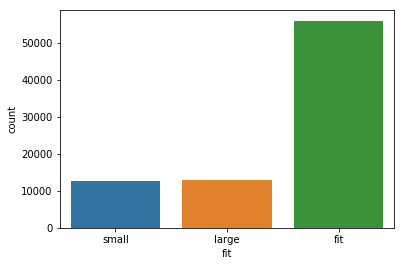

In [11]:
sns.countplot(df['fit'])

In [12]:
X=df.drop('fit',axis=1)
y=df.fit
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=6)

In [13]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  cloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)

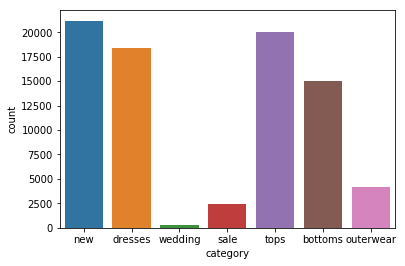

In [16]:
sns.countplot(df.category)

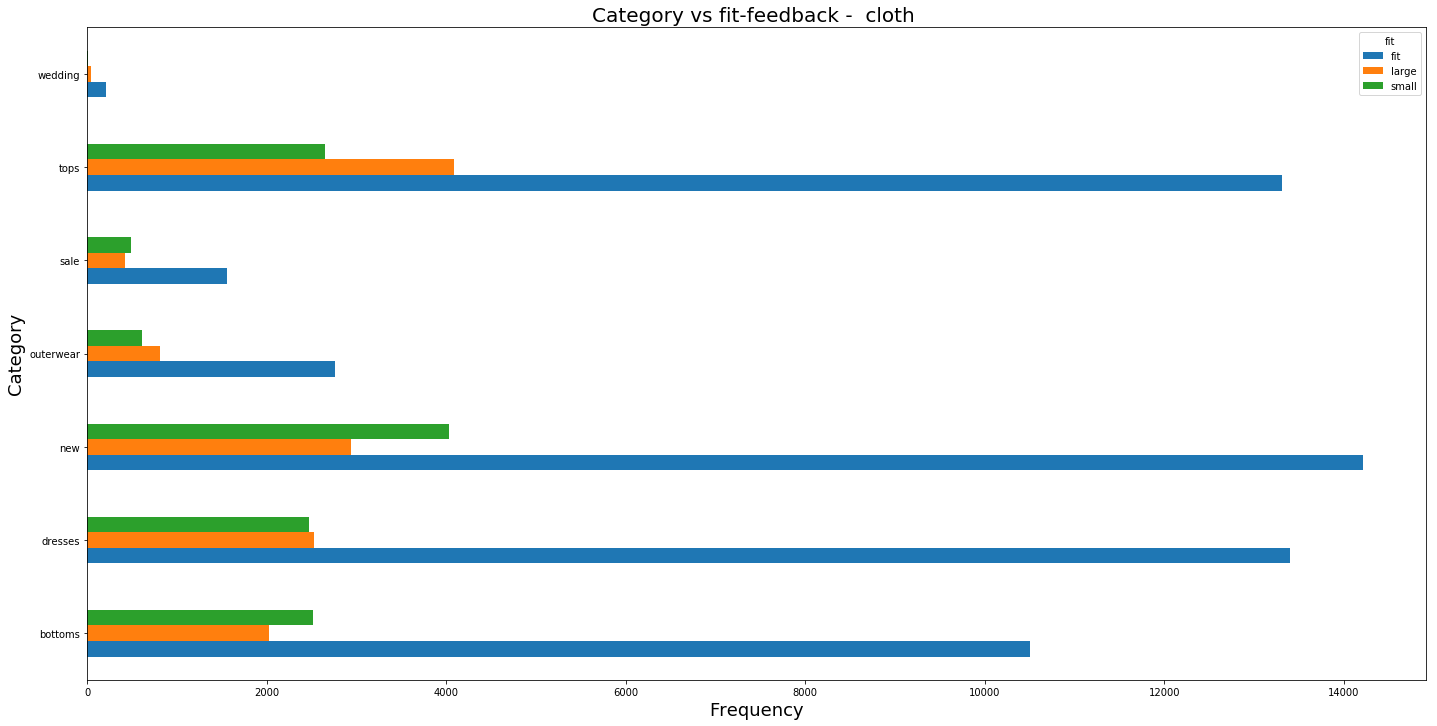

In [14]:
g_by_category=df.groupby('category')
cat_fit=g_by_category.fit.value_counts()
cat_fit=cat_fit.unstack()
plot_barh(cat_fit,'fit')

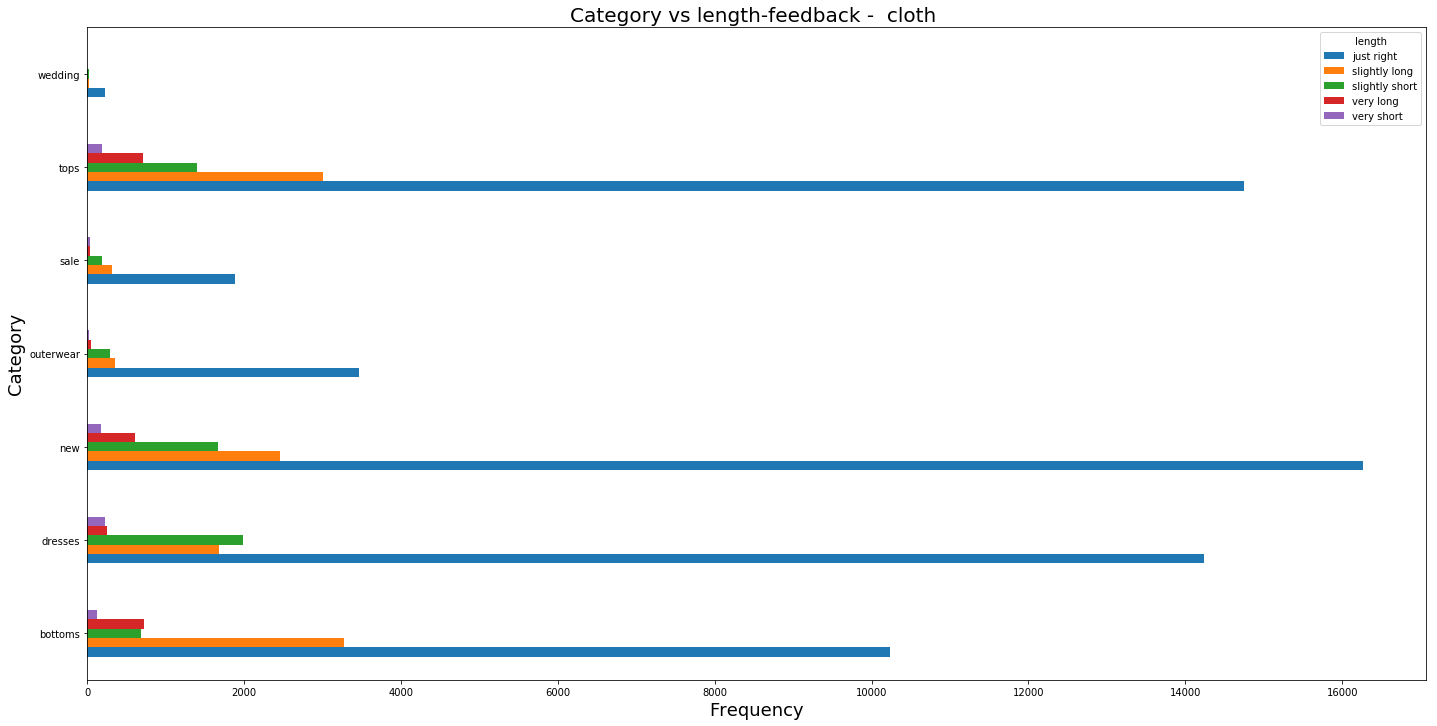

In [15]:
cat_len=g_by_category.length.value_counts()
cat_len=cat_len.unstack()
plot_barh(cat_len,'length')

In [17]:
def get_cms(x):
    if type(x) == type(1.0):
        return

    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)

In [18]:
X_train.height=X_train['height'].apply(get_cms)
X_test.height=X_test['height'].apply(get_cms)

In [19]:
X_train=pd.get_dummies(X_train,columns=['category','cup_size','length'])
X_test=pd.get_dummies(X_test,columns=['category','cup_size','length'])

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,classification_report
def params(yt,yp):
  print('Accuracy:',accuracy_score(yt,yp))
  print('F1score:',f1_score(yt,yp,average=None))
  print('Prec:',precision_score(yt,yp,average=None))
  print('Recall',recall_score(yt,yp,average=None))
  print('-'*10)

In [44]:
model=DecisionTreeClassifier(random_state=6)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)
print('Test')
params(y_test,y_pred)
print('Train')
params(y_train,y_train_pred)

Test
Accuracy: 0.5832435845062577
F1score: [0.72249436 0.29272748 0.29599178]
Prec: [0.73697507 0.28182018 0.28383706]
Recall [0.70857174 0.30451306 0.30923407]
----------
Train
Accuracy: 1.0
F1score: [1. 1. 1.]
Prec: [1. 1. 1.]
Recall [1. 1. 1.]
----------


In [48]:
from sklearn.model_selection import GridSearchCV

In [56]:
weights = np.linspace(0.05, 0.95, 20)
parameters = {'max_depth':[5,10],'criterion':['gini','entropy'],'min_samples_leaf':[0.5,1,5,10]}

grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(X_train,y_train)
y_pred_grid=grid.predict(X_test)
y_train_pred_grid=grid.predict(X_train)
print('Test')
params(y_test,y_pred_grid)
print('Train')
params(y_train,y_train_pred_grid)
print(grid.best_params_)

Test
Accuracy: 0.6998180265161362
F1score: [0.81899247 0.24951473 0.18236233]
Prec: [0.71727048 0.48524365 0.55663825]
Recall [0.95433445 0.16793349 0.10904319]
----------
Train
Accuracy: 0.6983920829751038
F1score: [0.81786502 0.2541047  0.17881706]
Prec: [0.71460517 0.49381891 0.57268722]
Recall [0.95600727 0.17106481 0.10594947]
----------
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}
